In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
bt=pd.read_csv('boston_train.csv')

In [21]:
bt.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [22]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [23]:
bt.drop('ID',axis=1,inplace=True)

In [24]:
X=bt[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]
Y=bt[['medv']]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)
lm=LinearRegression()
lm.fit(X_train,Y_train)
predictions=lm.predict(X_test)

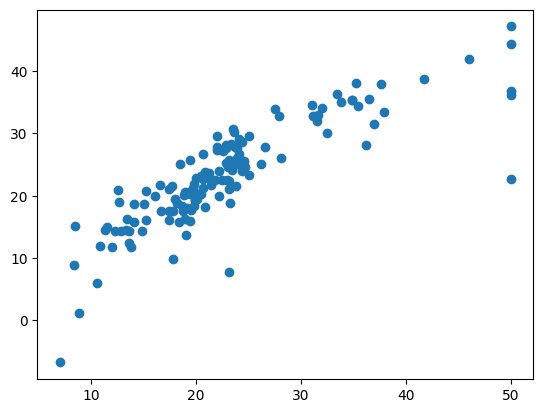

In [38]:
plt.scatter(Y_test,predictions)

In [39]:
from sklearn import metrics

In [40]:
print('MSE:',metrics.mean_squared_error(Y_test,predictions))
print('MAE:',metrics.mean_absolute_error(Y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MSE: 22.814964455203153
MAE: 3.2170834645968105
RMSE: 4.776501277630223


In [42]:
from tensorflow.keras.models import Sequential

In [43]:
model=Sequential()

In [47]:
from tensorflow.keras.layers import Dense
model.add(Dense(units=128,activation='relu',input_shape=(13,)))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
history=model.fit(X_train,Y_train,epochs=15,verbose=1,validation_split=0.05)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1792      
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
 dense_16 (Dense)            (None, 128)              